## Guided Project: Clean and Analyze Employee Exit Surveys

Working on guided projects gives you hands on experience with real world examples, which also means they'll be more challenging than lessons. However, keep in mind that now you have more tools you can use to clean and transform data than you did at the beginning of this course, including:

- Vectorized string methods to clean string columns

- The `apply()`, `map()`, and `applymap()` methods to transform data

- The `fillna()`, `dropna()`, and `drop()` methods to drop missing or unnecessary values

- The `melt()` function to reshape data

- The `concat()` and `merge()` functions to combine data


In this guided project, we'll work with exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia. 

You can find the DETE exit survey data here here. The original TAFE exit survey data is no longer available. 

We've made some slight modifications to the original datasets to make them easier to work with, including changing the encoding to UTF-8 (the original ones are encoded using cp1252.)

In this project, we'll play the role of data analyst and pretend our stakeholders want to know the following:

- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? 

- What about employees who have been there longer?

- Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

**They want us to combine the results for both surveys to answer these questions**. However, although both used the same survey template, one of them customized some of the answers. 

In the guided steps, we'll aim to do most of the data cleaning and get you started analyzing the first question.

A data dictionary wasn't provided with the dataset. 

**In a job setting, we'd make sure to meet with a manager to confirm the definitions of the data**. For this project, we'll use our general knowledge to define the columns.

Below is a preview of a couple columns we'll work with from the **`dete_survey.csv`**:

- `ID`: An id used to identify the participant of the survey

- `SeparationType`: The reason why the person's employment ended

- `Cease Date`: The year or month the person's employment ended

- `DETE Start Date`: The year the person began employment with the DETE

Below is a preview of a couple columns we'll work with from the **`tafe_survey.csv`**:

- `Record ID`: An id used to identify the participant of the survey

- `Reason for ceasing employment`: The reason why the person's employment ended

- `LengthofServiceOverall. Overall Length of Service at Institute (in years):` The length of the person's employment (in years)

In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [2]:
dete_survey = pd.read_csv("dete_survey.csv")
tafe_survey = pd.read_csv("tafe_survey.csv")

In [3]:
def missing_on_columns(df):
    df_nulls = df.isnull().sum()
    len_df_nulls = len(df_nulls)

    zero_NaN=0
    cnt=0
    
    for pos_column in range(len_df_nulls):
        if df_nulls.iloc[pos_column] > zero_NaN:
            cnt+=1
            print(df_nulls.index[pos_column], "\n")
            print(df[df_nulls.index[pos_column]].value_counts(dropna = False), "\n")
    print(f"# columns with missing values: {cnt} of: {len_df_nulls} ","\n" )

### dete_survey

In [4]:
dete_survey.info() # Department of Education, Training and Employment

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

In [5]:
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,A,A,N,N,N,A,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,A,N,N,N,N,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,A,A,N,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,N,N,N,A,A,N,N,A,A,A,A,A,A,A,A,A,A,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,A,A,N,N,D,D,N,A,A,A,A,A,A,SA,SA,D,D,A,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [6]:
dete_survey.isnull().sum()

ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

Use other **data exploration methods** such as the `Series.value_counts()` and `DataFrame.isnull()` methods to explore the data and figure out some next steps.

In [7]:
missing_on_columns(dete_survey) #columns with almost 1 missing value 

Position 

Position
Teacher                                                    324
Teacher Aide                                               137
Public Servant                                             126
Cleaner                                                     97
Head of Curriculum/Head of Special Education                38
Schools Officer                                             24
School Administrative Staff                                 16
Guidance Officer                                            12
Technical Officer                                           11
Professional Officer                                         7
Other                                                        7
School Principal                                             5
School Based Professional Staff (Therapist, nurse, etc)      5
NaN                                                          5
Deputy Principal                                             4
Business Service Manager           

### tafe_survey

In [8]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

In [9]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Main Factor. Which of these was the main factor for leaving?,InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction,InstituteViews. Topic:2. I was given access to skills training to help me do my job better,InstituteViews. Topic:3. I was given adequate opportunities for personal development,InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%,InstituteViews. Topic:5. I felt the salary for the job was right for the responsibilities I had,InstituteViews. Topic:6. The organisation recognised when staff did good work,InstituteViews. Topic:7. Management was generally supportive of me,InstituteViews. Topic:8. Management was generally supportive of my team,InstituteViews. Topic:9. I was kept informed of the changes in the organisation which would affect me,InstituteViews. Topic:10. Staff morale was positive within the Institute,InstituteViews. Topic:11. If I had a workplace issue it was dealt with quickly,InstituteViews. Topic:12. If I had a workplace issue it was dealt with efficiently,InstituteViews. Topic:13. If I had a workplace issue it was dealt with discreetly,WorkUnitViews. Topic:14. I was satisfied with the quality of the management and supervision within my work unit,WorkUnitViews. Topic:15. I worked well with my colleagues,WorkUnitViews. Topic:16. My job was challenging and interesting,WorkUnitViews. Topic:17. I was encouraged to use my initiative in the course of my work,WorkUnitViews. Topic:18. I had sufficient contact with other people in my job,WorkUnitViews. Topic:19. I was given adequate support and co-operation by my peers to enable me to do my job,WorkUnitViews. Topic:20. I was able to use the full range of my skills in my job,WorkUnitViews. Topic:21. I was able to use the full range of my abilities in my job. ; Category:Level of Agreement; Question:YOUR VIEWS ABOUT YOUR WORK UNIT],WorkUnitViews. Topic:22. I was able to use the full range of my knowledge in my job,WorkUnitViews. Topic:23. My job provided sufficient variety,WorkUnitViews. Topic:24. I was able to cope with the level of stress and pressure in my job,WorkUnitViews. Topic:25. My job allowed me to balance the demands of work and family to my satisfaction,WorkUnitViews. Topic:26. My supervisor gave me adequate personal recognition and feedback on my performance,"WorkUnitViews. Topic:27. My working environment was satisfactory e.g. sufficient space, good lighting, suitable seating and working area",WorkUnitViews. Topic:28. I was given the opportunity to mentor and coach others in order for me to pass on my skills and knowledge prior to my cessation date,WorkUnitViews. Topic:29. There was adequate communication between staff in my unit,WorkUnitViews. Topic:30. Staff morale was positive within my work unit,Induction. Did you undertake Workplace Induction?,InductionInfo. Topic:Did you undertake a Corporate Induction?,InductionInfo. Topic:Did you undertake a Institute Induction?,InductionInfo. Topic: Did you undertake Team Induction?,InductionInfo. Face to Face Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. On-line Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. Induction Manual Topic:Did you undertake a Corporate Induction?,InductionInfo. Face to Face Topic:Did you undertake a Institute Induction?,InductionInfo. On-line Topic:Did you undertake a Institute Induction?

In [10]:
tafe_survey.isnull().sum()

Record ID                                                                                                                                                          0
Institute                                                                                                                                                          0
WorkArea                                                                                                                                                           0
CESSATION YEAR                                                                                                                                                     7
Reason for ceasing employment                                                                                                                                      1
Contributing Factors. Career Move - Public Sector                                                                                                                265
Contributi

In [11]:
missing_on_columns(tafe_survey)

CESSATION YEAR 

CESSATION YEAR
2011.0    268
2012.0    235
2010.0    103
2013.0     85
NaN         7
2009.0      4
Name: count, dtype: int64 

Reason for ceasing employment 

Reason for ceasing employment
Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
NaN                           1
Name: count, dtype: int64 

Contributing Factors. Career Move - Public Sector  

Contributing Factors. Career Move - Public Sector 
-                              375
NaN                            265
Career Move - Public Sector     62
Name: count, dtype: int64 

Contributing Factors. Career Move - Private Sector  

Contributing Factors. Career Move - Private Sector 
-                               336
NaN                             265
Career Move - Private Sector    101
Name: count, dtype: int64 

Contributing Factors. Career Move - Self-employment 

Contribut

### Observaciones:

`dete_survey` dataframe contains `'Not Stated'` **values that indicate values are missing, but they aren't represented as `NaN`**.

**Both** the `dete_survey` and `tafe_survey` dataframes contain **many columns that we don't need to complete our analysis**.

**Each dataframe contains many of the same columns, but the column names are different**.

**There are multiple columns/answers that indicate an employee resigned because they were dissatisfied.**

## 2. Identify Missing Values and Drop Unnecessary Columns

Read the `dete_survey.csv` CSV file into pandas again, but this time read the Not Stated values in as NaN.

To read **Not Stated in as NaN**, set the `na_values` parameter to Not Stated in the `pd.read_csv()` function.
Assign the result to the variable name `dete_survey`.

In [12]:
dete_survey = pd.read_csv('dete_survey.csv',na_values = 'Not Stated'  ) # preguntar esto del "not stated"
dete_survey.isnull().sum()

ID                                       0
SeparationType                           0
Cease Date                              34
DETE Start Date                         73
Role Start Date                         98
Position                                 5
Classification                         367
Region                                 105
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

como resultado de haber introducido en el parametro `na_values` not stated, aparecen mas valores NaN!  

las columnas a eliminar en `dete_survey` seran estas: `dete_survey.columns[28:49]` 

y el resultado lo asigno a `dete_survey_updated`

In [13]:
dete_survey.columns[28:49] # Columnas a eliminar en dete_survey

Index(['Professional Development', 'Opportunities for promotion',
       'Staff morale', 'Workplace issue', 'Physical environment',
       'Worklife balance', 'Stress and pressure support',
       'Performance of supervisor', 'Peer support', 'Initiative', 'Skills',
       'Coach', 'Career Aspirations', 'Feedback', 'Further PD',
       'Communication', 'My say', 'Information', 'Kept informed',
       'Wellness programs', 'Health & Safety'],
      dtype='object')

In [14]:
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49],axis =1)
dete_survey_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   822 non-null    int64  
 1   SeparationType                       822 non-null    object 
 2   Cease Date                           788 non-null    object 
 3   DETE Start Date                      749 non-null    float64
 4   Role Start Date                      724 non-null    float64
 5   Position                             817 non-null    object 
 6   Classification                       455 non-null    object 
 7   Region                               717 non-null    object 
 8   Business Unit                        126 non-null    object 
 9   Employment Status                    817 non-null    object 
 10  Career move to public sector         822 non-null    bool   
 11  Career move to private sector   

columnas a eliminar en `tafe_survey`

In [15]:
tafe_survey.columns[17:66]

Index(['Main Factor. Which of these was the main factor for leaving?',
       'InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction',
       'InstituteViews. Topic:2. I was given access to skills training to help me do my job better',
       'InstituteViews. Topic:3. I was given adequate opportunities for personal development',
       'InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%',
       'InstituteViews. Topic:5. I felt the salary for the job was right for the responsibilities I had',
       'InstituteViews. Topic:6. The organisation recognised when staff did good work',
       'InstituteViews. Topic:7. Management was generally supportive of me',
       'InstituteViews. Topic:8. Management was generally supportive of my team',
       'InstituteViews. Topic:9. I was kept informed of the changes in the organisation which would affect me',
       'InstituteViews. Topic:10. Staff morale was positive w

In [16]:
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66],axis =1)
tafe_survey_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 23 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   Record ID                                                                  702 non-null    float64
 1   Institute                                                                  702 non-null    object 
 2   WorkArea                                                                   702 non-null    object 
 3   CESSATION YEAR                                                             695 non-null    float64
 4   Reason for ceasing employment                                              701 non-null    object 
 5   Contributing Factors. Career Move - Public Sector                          437 non-null    object 
 6   Contributing Factors. Career Move - Private Sector        

## Write a markdown cell explaining the changes you made and why.

#### we eventually want to combine them, we'll have to standardize the column names

- Rename the remaining columns in the `dete_survey_updated` dataframe.

- Use the following criteria to update the column names:

    - Make all the capitalization lowercase.

    - Remove any trailing whitespace from the end of the strings.

    - Replace spaces with underscores ('_').

    - As an example, Cease Date should be updated to cease_date.

Remember you can use the DataFrame.columns attribute to print an array of the existing column names.

In [17]:
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.replace(' ','_').str.rstrip()
dete_survey_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   822 non-null    int64  
 1   separationtype                       822 non-null    object 
 2   cease_date                           788 non-null    object 
 3   dete_start_date                      749 non-null    float64
 4   role_start_date                      724 non-null    float64
 5   position                             817 non-null    object 
 6   classification                       455 non-null    object 
 7   region                               717 non-null    object 
 8   business_unit                        126 non-null    object 
 9   employment_status                    817 non-null    object 
 10  career_move_to_public_sector         822 non-null    bool   
 11  career_move_to_private_sector   

Use the `DataFrame.rename()` method to update the columns below in `tafe_survey_updated`. 

'Record ID': 'id'
'CESSATION YEAR': 'cease_date'
'Reason for ceasing employment': 'separationtype'
'Gender. What is your Gender?': 'gender'
'CurrentAge. Current Age': 'age'
'Employment Type. Employment Type': 'employment_status'
'Classification. Classification': 'position'
'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service'
'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'

In [18]:
tafe_survey_updated.rename({'Record ID': 'id',
                            'CESSATION YEAR': 'cease_date',
                            'Reason for ceasing employment': 'separationtype',
                            'Gender. What is your Gender?': 'gender',
                            'CurrentAge. Current Age': 'age',
                            'Employment Type. Employment Type': 'employment_status',
                            'Classification. Classification': 'position',
                            'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
                            'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'},
                          axis=1, inplace=True)

tafe_survey_updated.dtypes

id                                                     float64
Institute                                               object
WorkArea                                                object
cease_date                                             float64
separationtype                                          object
Contributing Factors. Career Move - Public Sector       object
Contributing Factors. Career Move - Private Sector      object
Contributing Factors. Career Move - Self-employment     object
Contributing Factors. Ill Health                        object
Contributing Factors. Maternity/Family                  object
Contributing Factors. Dissatisfaction                   object
Contributing Factors. Job Dissatisfaction               object
Contributing Factors. Interpersonal Conflict            object
Contributing Factors. Study                             object
Contributing Factors. Travel                            object
Contributing Factors. Other                            

In [19]:
dete_survey_updated.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,career_move_to_public_sector,career_move_to_private_sector,interpersonal_conflicts,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,maternity/family,relocation,study/travel,ill_health,traumatic_incident,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [20]:
tafe_survey_updated.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,-,-,-,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,-,-,-,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,-,-,-,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,-,-,-,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


## Write a markdown cell explaining the changes you made and why.

## 4. Filter the Data

Recall that our end goal is to answer the following question:

### Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? 

### What about employees who have been at the job longer?


If we look at the **unique values** in the `separationtype` columns in **each dataframe**, we'll see that each contains a couple of different separation types. 

For this project, **we'll only analyze survey respondents who resigned**, so their separation type contains the string `'Resignation'`.

In [21]:
dete_survey_updated['separationtype'].unique()

array(['Ill Health Retirement', 'Voluntary Early Retirement (VER)',
       'Resignation-Other reasons', 'Age Retirement',
       'Resignation-Other employer',
       'Resignation-Move overseas/interstate', 'Other',
       'Contract Expired', 'Termination'], dtype=object)

In [22]:
tafe_survey_updated['separationtype'].unique()

array(['Contract Expired', 'Retirement', 'Resignation',
       'Retrenchment/ Redundancy', 'Termination', 'Transfer', nan],
      dtype=object)

In [23]:
dete_survey_updated['separationtype'].value_counts(dropna=False)

separationtype
Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: count, dtype: int64

In [24]:
tafe_survey_updated['separationtype'].value_counts(dropna=False)

separationtype
Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
NaN                           1
Name: count, dtype: int64

### In each of dataframes, select only the data for survey respondents who have a Resignation separation type.

In [25]:
dete_resignations=dete_survey_updated[(dete_survey_updated['separationtype']=='Resignation-Other reasons') |
                                      (dete_survey_updated['separationtype']=='Resignation-Other employer') |
                                      (dete_survey_updated['separationtype']=='Resignation-Move overseas/interstate')].copy()

In [26]:
#dete_survey_updated

In [27]:
dete_survey_updated['separationtype'].value_counts(dropna=False)

separationtype
Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: count, dtype: int64

In [28]:
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [29]:
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype']=='Resignation'].copy()
#tafe_resignations

In [30]:
tafe_resignations['separationtype'].value_counts()

separationtype
Resignation    340
Name: count, dtype: int64

### Write a markdown paragraph explaining the changes you made and why.

## 5. Verify the Data 

let's verify that the data doesn't contain any major inconsistencies, When you're working with real world data, don't assume that the data you're analyzing isn't corrupted in some way!

In this step, we'll focus on verifying that the **years** in the `cease_date` and `dete_start_date` columns make sense. However, we encourage you to check the data for other issues as well!


In [31]:
import seaborn as sns

<Axes: ylabel='cease_date'>

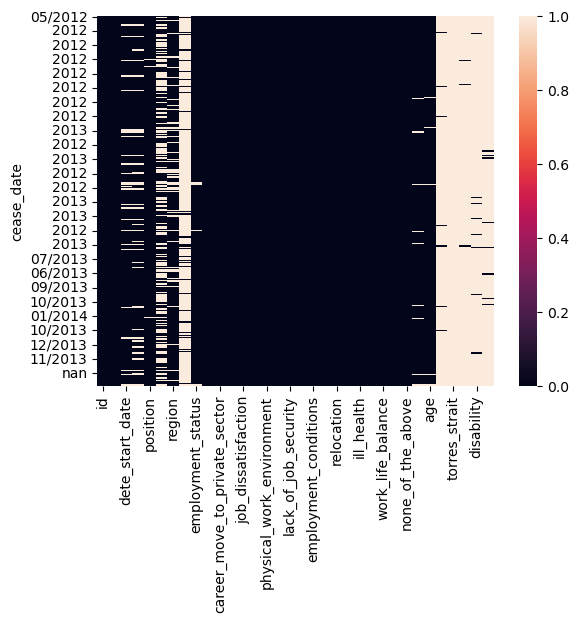

In [32]:
combined_cease_date = dete_resignations.set_index('cease_date')
sns.heatmap(combined_cease_date.isnull(), cbar=True)

<Axes: ylabel='dete_start_date'>

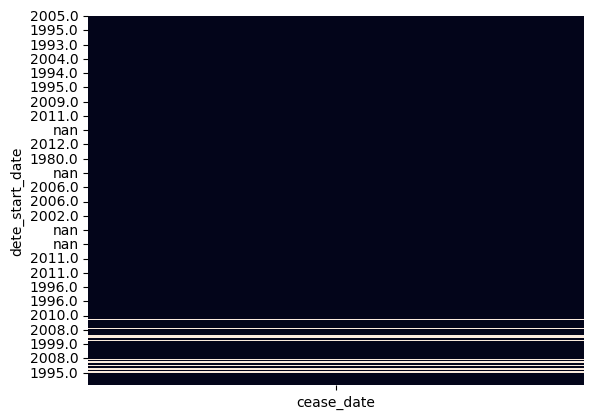

In [33]:
combined_dete_start = dete_resignations.set_index('dete_start_date')
sns.heatmap(combined_dete_start[['cease_date']].isnull(), cbar=False)

In [34]:
combined_dete_start[['cease_date']].isnull().index.unique().value_counts(dropna=False)

dete_start_date
2005.0    1
1994.0    1
2009.0    1
1997.0    1
1998.0    1
2007.0    1
NaN       1
1982.0    1
1980.0    1
1973.0    1
1995.0    1
2003.0    1
2006.0    1
2011.0    1
1977.0    1
1974.0    1
1976.0    1
1993.0    1
2008.0    1
1986.0    1
2002.0    1
2004.0    1
2010.0    1
2012.0    1
1989.0    1
1999.0    1
1996.0    1
2000.0    1
1991.0    1
1992.0    1
2001.0    1
1988.0    1
1990.0    1
1985.0    1
1963.0    1
2013.0    1
1972.0    1
1983.0    1
1971.0    1
1984.0    1
1975.0    1
1987.0    1
Name: count, dtype: int64

In [35]:
combined_dete_start[['cease_date']].isnull().index.unique().value_counts(dropna=False).sum()

np.int64(42)

<Axes: ylabel='cease_date'>

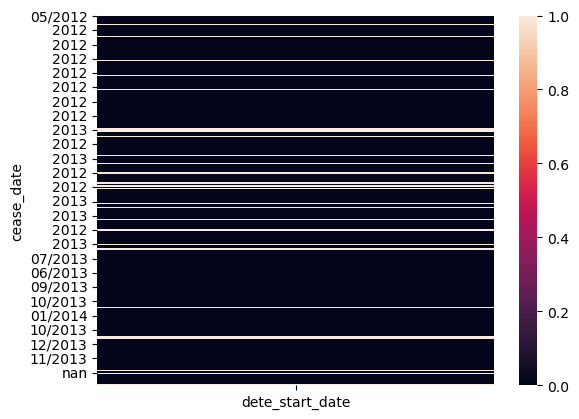

In [36]:
combined_cease_date = dete_resignations.set_index('cease_date')
sns.heatmap(combined_cease_date[['dete_start_date']].isnull(), cbar=True)

In [37]:
combined_cease_date[['dete_start_date']].isnull().index.unique().value_counts(dropna=False)

cease_date
05/2012    1
07/2012    1
2012       1
2013       1
2010       1
07/2013    1
06/2013    1
09/2013    1
09/2010    1
01/2014    1
05/2013    1
08/2013    1
10/2013    1
12/2013    1
11/2013    1
NaN        1
07/2006    1
Name: count, dtype: int64

In [38]:
combined_cease_date[['dete_start_date']].isnull().index.unique().value_counts(dropna=False).sum()

np.int64(17)

### tafe_resignations

In [39]:
tafe_resignations.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

<Axes: ylabel='cease_date'>

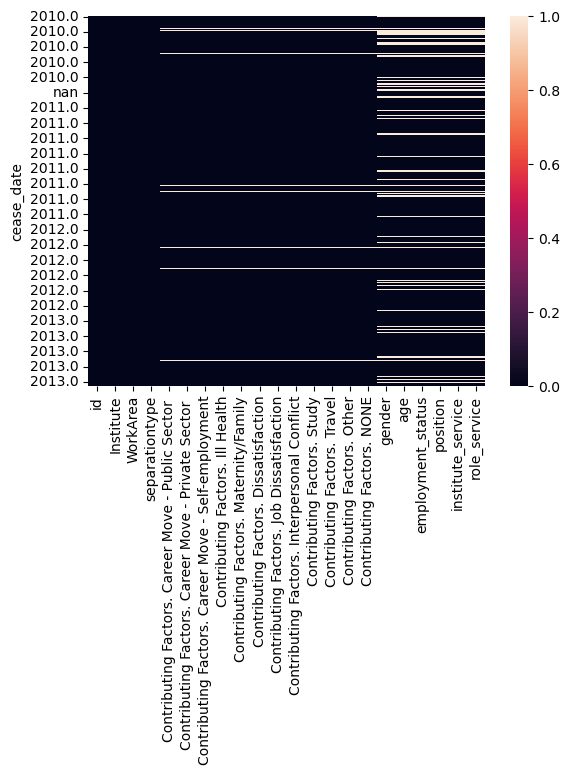

In [40]:
combined_tafe_date = tafe_resignations.set_index('cease_date')
sns.heatmap(combined_tafe_date.isnull(), cbar=True)

<Axes: ylabel='cease_date'>

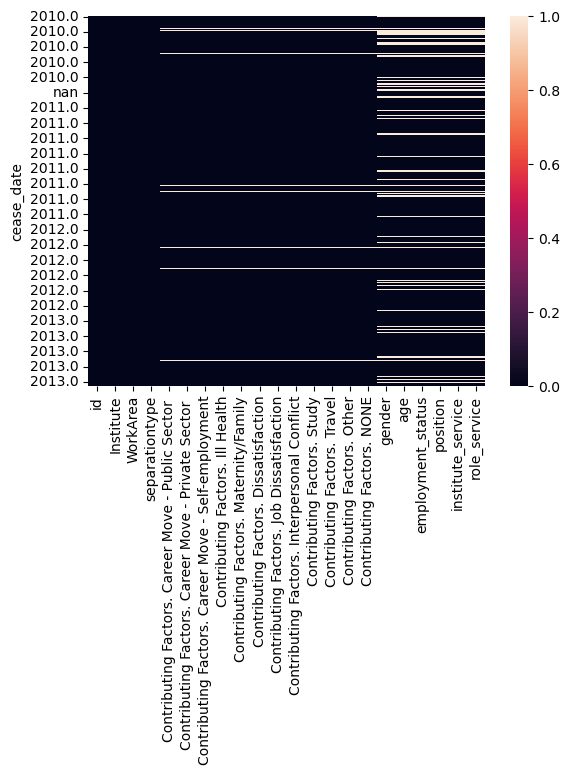

In [41]:
combined_tafe_date = tafe_resignations.set_index('cease_date')
sns.heatmap(combined_tafe_date.isnull(), cbar=True)

In [42]:
tafe_resignations['cease_date'].isnull().value_counts()

cease_date
False    335
True       5
Name: count, dtype: int64

In [43]:
tafe_resignations[tafe_resignations['cease_date'].isnull()]

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
93,6.342677e+17,Central Queensland Institute of TAFE,Delivery (teaching),NaN,Resignation,-,Career Move - Private Sector,-,-,-,-,-,-,-,-,-,-,Male,56 or older,Permanent Full-time,Teacher (including LVT),11-20,11-20
104,6.342807e+17,Wide Bay Institute of TAFE,Non-Delivery (corporate),NaN,Resignation,Career Move - Public Sector,-,-,-,-,-,-,-,-,-,-,-,Female,36 40,Permanent Full-time,Administration (AO),11-20,11-20
113,6.342978e+17,Brisbane North Institute of TAFE,Non-Delivery (corporate),NaN,Resignation,-,-,-,-,-,Contributing Factors. Dissatisfaction,-,-,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
135,6.343283e+17,Brisbane North Institute of TAFE,Delivery (teaching),NaN,Resignation,-,-,-,-,-,Contributing Factors. Dissatisfaction,-,-,-,-,-,-,NaN,NaN,NaN,NaN,NaN,NaN
513,6.347827e+17,Southbank Institute of Technology,Non-Delivery (corporate),NaN,Resignation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
tafe_resignations[tafe_resignations['cease_date'].isnull()].set_index

<bound method DataFrame.set_index of                id                             Institute  \
93   6.342677e+17  Central Queensland Institute of TAFE   
104  6.342807e+17            Wide Bay Institute of TAFE   
113  6.342978e+17      Brisbane North Institute of TAFE   
135  6.343283e+17      Brisbane North Institute of TAFE   
513  6.347827e+17     Southbank Institute of Technology   

                     WorkArea  cease_date separationtype  \
93        Delivery (teaching)         NaN    Resignation   
104  Non-Delivery (corporate)         NaN    Resignation   
113  Non-Delivery (corporate)         NaN    Resignation   
135       Delivery (teaching)         NaN    Resignation   
513  Non-Delivery (corporate)         NaN    Resignation   

    Contributing Factors. Career Move - Public Sector   \
93                                                   -   
104                        Career Move - Public Sector   
113                                                  -   
135            

In [45]:
tafe_resignations['cease_date'].isnull().index.unique().value_counts(dropna=False)

701    1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
13     1
14     1
15     1
16     1
17     1
18     1
19     1
20     1
21     1
22     1
23     1
642    1
644    1
645    1
647    1
648    1
650    1
652    1
654    1
630    1
634    1
635    1
636    1
637    1
639    1
640    1
641    1
614    1
621    1
622    1
623    1
625    1
626    1
627    1
628    1
592    1
593    1
595    1
596    1
602    1
603    1
606    1
610    1
116    1
118    1
119    1
121    1
122    1
124    1
125    1
126    1
102    1
103    1
104    1
105    1
107    1
109    1
113    1
114    1
92     1
93     1
94     1
96     1
97     1
98     1
100    1
101    1
82     1
84     1
85     1
86     1
87     1
88     1
89     1
91     1
169    1
172    1
174    1
175    1
178    1
179    1
180    1
181    1
152    1
153    1
159    1
160    1
161    1
164    1
167    1
168    1
136    1
137    1
138    1
145    1
148    1
149    1
150    1
151    1
128    1
129    1
130    1
1

Since the `cease_date` is the last year of the person's employment and the `dete_start_date` is the person's first year of employment, it wouldn't make sense to have years after the current date.

Given that most people in this field start working in their 20s, it's also unlikely that the `dete_start_date` was before the year 1940.

Use the `Series.value_counts()` to check the values in the `cease_date` and `dete_start_date` columns in `dete_resignations` 

### metodos vectorizados!

para hacer uso de los metodos vectorizados debemos indicar que la serie es de tipo `string` y no de tipo objeto, de esta manera se permite el uso del accesor `.str`

Como puedo observar todavía tengo 

<Axes: ylabel='cease_date'>

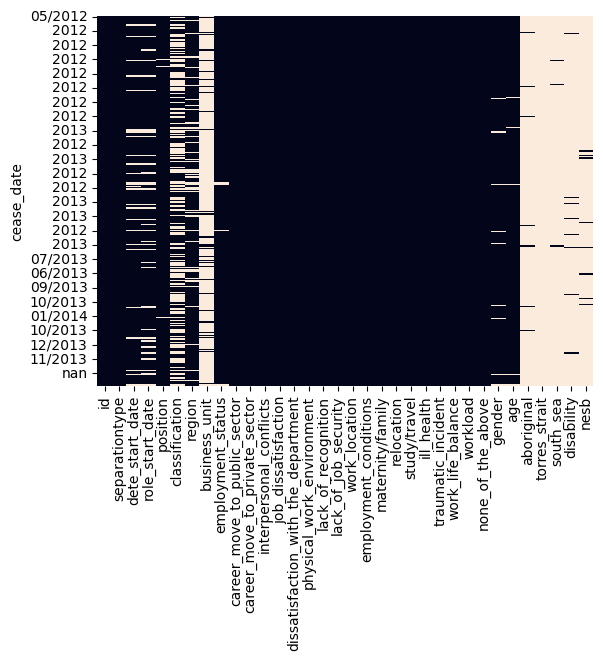

In [46]:
combined_cease_date = dete_resignations.set_index('cease_date')
sns.heatmap(combined_cease_date.isnull(), cbar=False)

<Axes: ylabel='dete_start_date'>

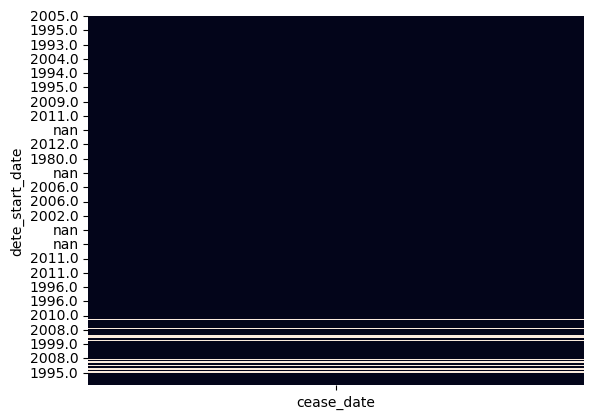

In [47]:
combined_dete_start = dete_resignations.set_index('dete_start_date')
sns.heatmap(combined_dete_start[['cease_date']].isnull(), cbar=False)

In [48]:
dete_resignations['cease_date'] = dete_resignations['cease_date'].astype("string").copy() 

In [49]:
dete_resignations['cease_date'].unique()

<StringArray>
['05/2012', '07/2012',    '2012',    '2013',    '2010', '07/2013', '06/2013',
 '09/2013', '09/2010', '01/2014', '05/2013', '08/2013', '10/2013', '12/2013',
 '11/2013',      <NA>, '07/2006']
Length: 17, dtype: string

In [50]:
dete_resignations['cease_date'].value_counts(dropna=False) ## otra pregunta para el foro

cease_date
2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
<NA>        11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
09/2010      1
2010         1
07/2012      1
07/2006      1
Name: count, dtype: Int64

### Dropna no funciona con la serie.

para eliminar los valores no conocidos "NaN" (ya que no se porque no funciona series.dropna()) lo que hago es un filtro booleano con quienes NO son NaN y hago una copia sobre la misma serie, de esta manera ya tengo la serie que es de tipo `strìng` y tengo eliminado lo que no quiero. 

si la serie no fuese de tipo `strìng` no funcionaria el invento porque el tipo de dato seria objeto y para los datos de tipo objeto no hay metodos de acceso .str.

In [51]:
dete_resignations = dete_resignations[dete_resignations['cease_date'].notnull()].copy()

In [52]:
dete_resignations['cease_date'].value_counts(dropna=False)

cease_date
2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
2010         1
07/2012      1
09/2010      1
07/2006      1
Name: count, dtype: Int64

### Extracción de los años mediante metodos vectorizados y expresiones regulares

Gracias a que antes he convertido la serie de tipo objeto en string ahora puedo extraer mediante expresiones regulares el texto que hace referencia al año.

In [53]:
pattern = r"([0-9]{4})"
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.extract(pattern, expand=False).astype(float) # expand True df False Series

Use the `Series.value_counts()` to check the values in the `cease_date` and `dete_start_date` columns in `dete_resignations` and the `cease_date` column in `tafe_resignations`.


Because `Series.value_counts()` returns a series, we can use `Series.sort_index()` method with `ascending= True` or `False` to view the highest and lowest values with their counts.

In [54]:
dete_resignations['cease_date'].value_counts(dropna=False)

cease_date
2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: count, dtype: int64

### Elimino los `NaN` de `dete_resignations['dete_start_date']`

In [55]:
dete_resignations = dete_resignations[dete_resignations['dete_start_date'].notnull()].copy()# no funciona dropna¿¿??

In [56]:
dete_resignations['dete_start_date'].value_counts(dropna = False).sort_index(ascending = True)

dete_start_date
1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1985.0     3
1986.0     3
1988.0     4
1989.0     4
1990.0     4
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     3
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     8
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    14
2006.0    12
2007.0    20
2008.0    22
2009.0    13
2010.0    17
2011.0    23
2012.0    20
2013.0    10
Name: count, dtype: int64

Visualizando de nuevo el dataset por columnas se puede apreciar de que ya no tenenos NaN ni en `dete_start_date` ni en `cease_date`

<Axes: ylabel='id'>

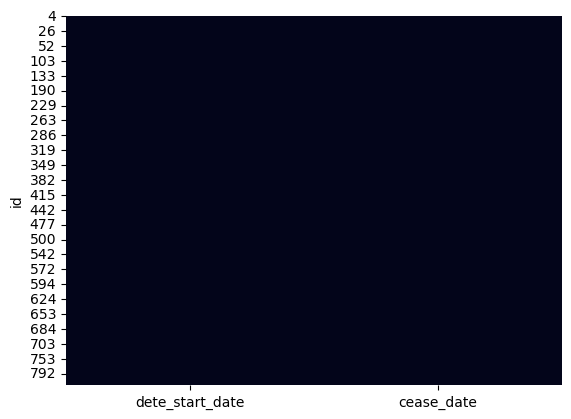

In [57]:
combined_dete_start = dete_resignations.set_index('id')
sns.heatmap(combined_dete_start[['dete_start_date','cease_date']].isnull(), cbar=False)

In [58]:
combined_dete_start.columns

Index(['separationtype', 'cease_date', 'dete_start_date', 'role_start_date',
       'position', 'classification', 'region', 'business_unit',
       'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

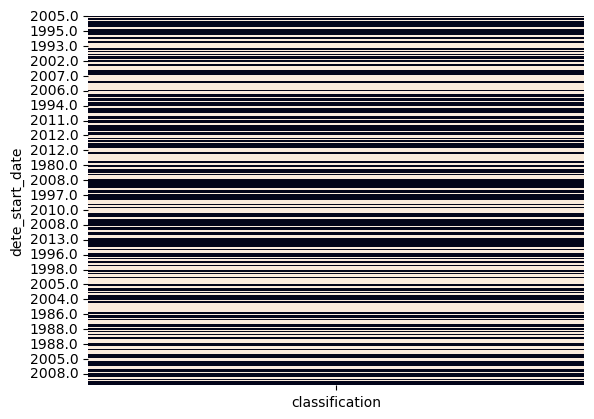

In [59]:
lista=[1,2,3,4,5] # esto es un invento

combined_dete_start = dete_resignations.set_index('dete_start_date')
#sns.heatmap(combined_dete_start.isnull(), cbar=False)
for a in lista:
    sns.heatmap(combined_dete_start.iloc[:,[a]].isnull(), cbar=False)

<Axes: ylabel='cease_date'>

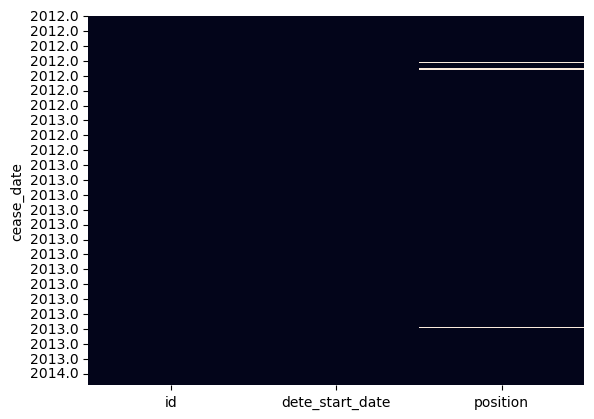

In [60]:
combined_cease_date = dete_resignations.set_index('cease_date')
sns.heatmap(combined_cease_date[['id','dete_start_date','position']].isnull(), cbar=False)

### Boxplot 

<Axes: >

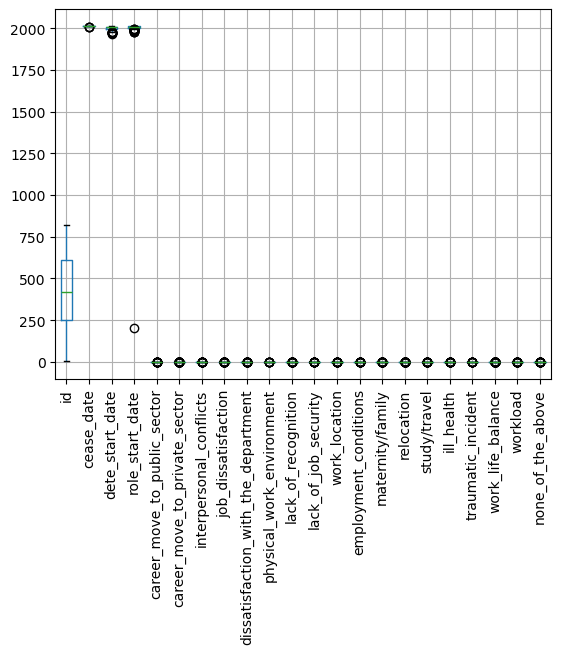

In [61]:
dete_resignations.boxplot(rot=90)

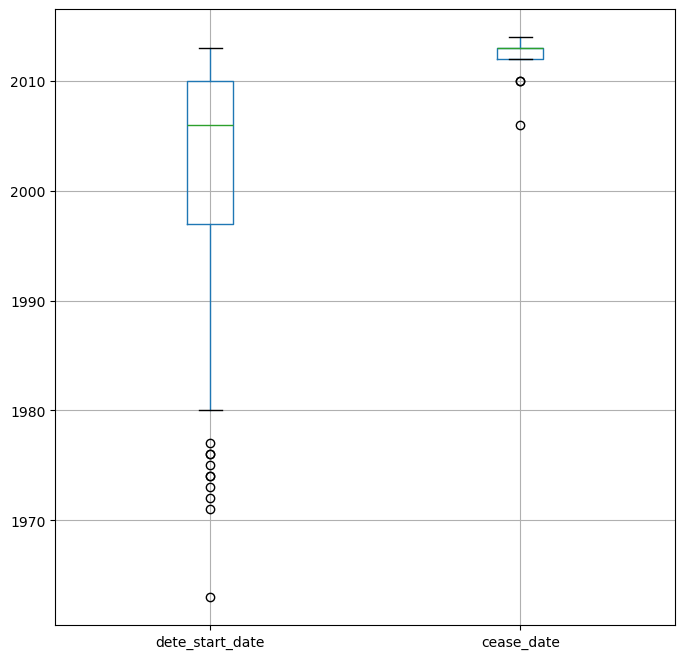

In [62]:
boxplot = dete_resignations.boxplot(column=['dete_start_date','cease_date'], figsize=(8,8))

<Axes: ylabel='Frequency'>

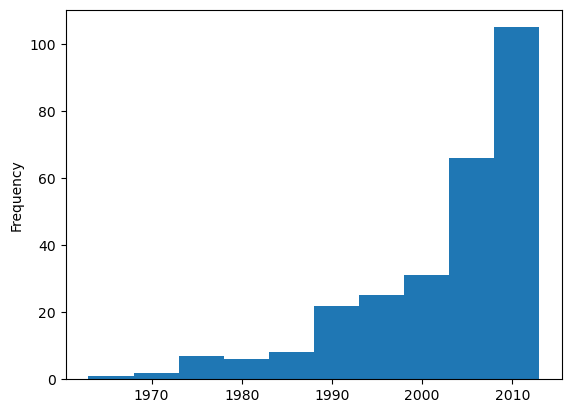

In [63]:
dete_resignations['dete_start_date'].plot.hist() #dtype: object. funciona

<Axes: ylabel='Frequency'>

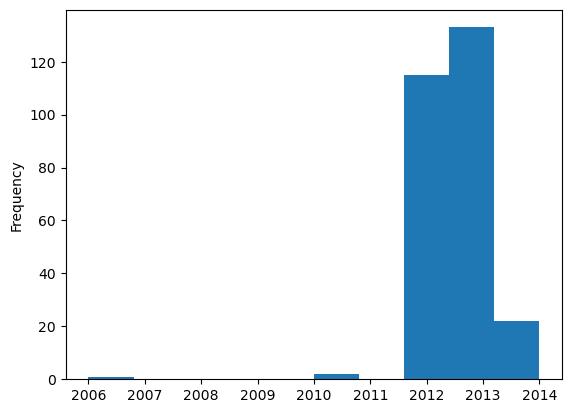

In [64]:
dete_resignations['cease_date'].plot.hist()  #dtype: float64. no funciona

{'whiskers': [<matplotlib.lines.Line2D at 0x7930b13e98e0>,
 'caps': [<matplotlib.lines.Line2D at 0x7930b1389160>,
 'boxes': [<matplotlib.lines.Line2D at 0x7930b13f9a60>],
 'medians': [<matplotlib.lines.Line2D at 0x7930b13896a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7930b1389940>],
 'means': []}

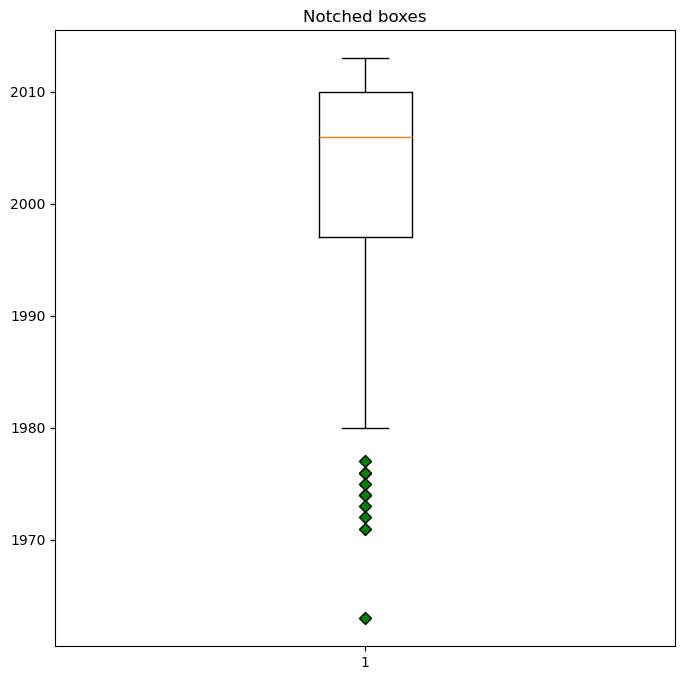

In [65]:
import matplotlib.pyplot as plt 

green_diamond = dict(markerfacecolor='g', marker='D')
fig2, ax2 = plt.subplots(figsize=(8,8))
ax2.set_title('Notched boxes')
ax2.boxplot(dete_resignations['dete_start_date'],  flierprops=green_diamond)

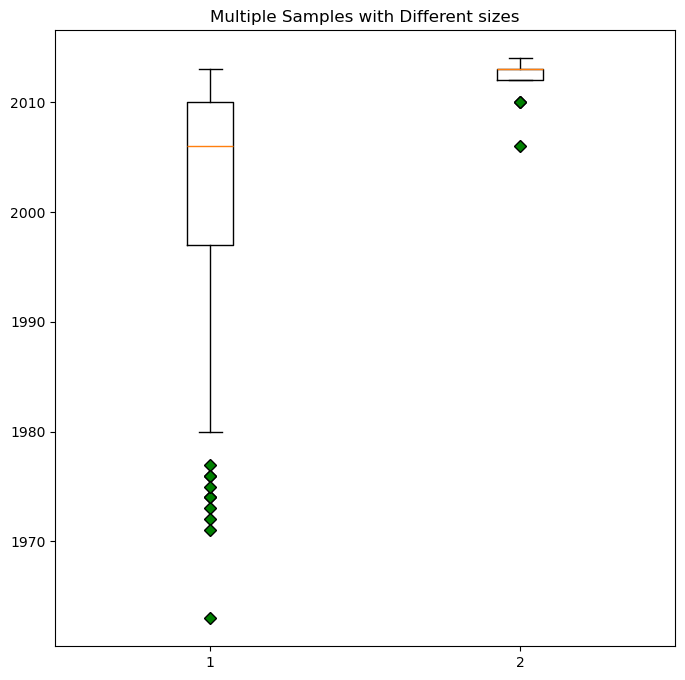

In [66]:

green_diamond = dict(markerfacecolor='g', marker='D')
data = [dete_resignations['dete_start_date'], dete_resignations['cease_date']]
fig7, ax7 = plt.subplots(figsize=(8,8))
ax7.set_title('Multiple Samples with Different sizes')
ax7.boxplot(data, flierprops=green_diamond)

plt.show()

In [67]:
dete_resignations['dete_start_date'].value_counts(dropna = False).sort_index(ascending = True)

dete_start_date
1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1985.0     3
1986.0     3
1988.0     4
1989.0     4
1990.0     4
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     3
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     8
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    14
2006.0    12
2007.0    20
2008.0    22
2009.0    13
2010.0    17
2011.0    23
2012.0    20
2013.0    10
Name: count, dtype: int64

and the `cease_date` column in `tafe_resignations`.

In [68]:
tafe_resignations['cease_date'].value_counts(dropna = False).sort_index(ascending = True)

cease_date
2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
NaN         5
Name: count, dtype: int64

In [69]:
dete_resignations = dete_resignations[dete_resignations['dete_start_date'].notnull()].copy()# no funciona dropna¿¿??

<Axes: ylabel='dete_start_date'>

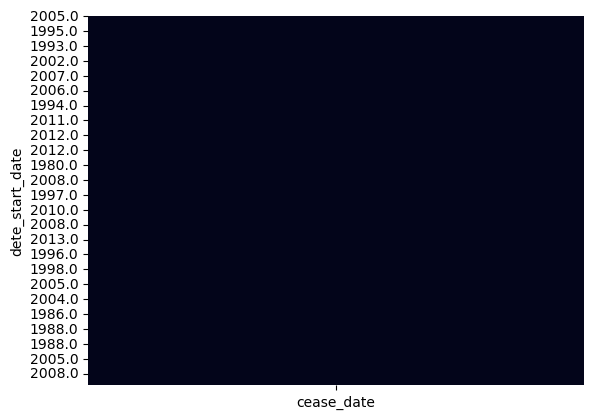

In [70]:
combined_cease_date = dete_resignations.set_index('dete_start_date') # retorna un df
sns.heatmap(combined_cease_date[['cease_date']].isnull(), cbar=False)

# 6
From the work we did in the last screen, we can verify:

- There aren't any major issues with the years.

- The years in each dataframe don't span quite the same number of years. We'll leave it up to your discretion to drop any years you don't think are needed for the analysis.

In [71]:
dete_resignations['institute_service']=dete_resignations['cease_date']-dete_resignations['dete_start_date']
#dete_resignations

# 7 Identify Dissatisfied Employees


In the last screen, we created a new institute_service column that we'll use to analyze survey respondents according to their length of employment.Next, we'll identify any employees who resigned because they were dissatisfied.

Below are the columns we'll use to categorize employees as "dissatisfied" from each dataframe. If you disagree, feel free to modify them! Just make sure you explain why you made that decision.

In [72]:
tafe_resignations['Contributing Factors. Dissatisfaction'].unique()

array(['-', 'Contributing Factors. Dissatisfaction ', nan], dtype=object)

In [73]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].unique()

array(['-', 'Job Dissatisfaction', nan], dtype=object)

In [74]:
tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']]

,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction
3,-,-
4,-,-
5,-,-
6,-,-
7,-,-
8,-,-
9,-,-
10,-,-
13,-,-
14,Contributing Factors. Dissatisfaction,Job Dissatisfaction


In [75]:
#tafe_resignations['Contributing Factors. Dissatisfaction'] = tafe_resignations['Contributing Factors. Dissatisfaction'].fillna("*")

In [76]:
#tafe_resignations['Contributing Factors. Job Dissatisfaction'] = tafe_resignations['Contributing Factors. Job Dissatisfaction'].fillna("*")

In [77]:
tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']]

,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction
3,-,-
4,-,-
5,-,-
6,-,-
7,-,-
8,-,-
9,-,-
10,-,-
13,-,-
14,Contributing Factors. Dissatisfaction,Job Dissatisfaction


In [78]:
def update_vals(element):
    if pd.isnull(element):        
        return np.nan
    elif element=='-':
        return False
    else:
        return True

In [79]:
columns = ['Contributing Factors. Dissatisfaction',
           'Contributing Factors. Job Dissatisfaction']

tafe_resignations['dissatisfied'] = tafe_resignations[columns].applymap(update_vals).any(axis=1, skipna=False)
tafe_resignations_up = tafe_resignations.copy()

tafe_resignations_up['dissatisfied'].value_counts(dropna=False)

/tmp/ipykernel_351459/808426186.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  tafe_resignations['dissatisfied'] = tafe_resignations[columns].applymap(update_vals).any(axis=1, skipna=False)


dissatisfied
False    241
True      99
Name: count, dtype: int64

In [80]:
#dete_resignations.isnull()

In [81]:
#dete_resignations

In [82]:
columnas = ['job_dissatisfaction',
            'dissatisfaction_with_the_department',
            'physical_work_environment',
            'lack_of_recognition',
            'lack_of_job_security',
            'work_location',
            'employment_conditions',
            'work_life_balance',
            'workload']

dete_resignations['dissatisfied'] = dete_resignations[columnas].any(axis=1, skipna=False)
dete_resignations_up = dete_resignations.copy()

dete_resignations_up['dissatisfied'].value_counts(dropna=False)

dissatisfied
True     137
False    136
Name: count, dtype: int64

In [83]:
#dete_resignations_up

In [84]:
tafe_resignations_up

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service,dissatisfied
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,-,-,-,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN,False
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,-,-,-,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4,False
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,-,-,-,-,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10,False
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,-,-,-,-,-,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4,False
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,-,-,-,-,-,Other,-,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4,False
8,6.341579e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2009.0,Resignation,-,-,-,-,-,-,-,-,-,-,Other,-,Female,36 40,Temporary Full-time,Tutor,3-4,3-4,False
9,6.341588e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,Career Move - Public Sector,-,-,-,-,-,-,-,-,-,Other,-,Female,21 25,Permanent Full-time,Administration (AO),1-2,1-2,False
10,6.341588e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,Career Move - Public Sector,-,-,-,-,-,-,-,-,-,-,-,Female,41 45,Temporary Part-time,Administration (AO),Less than 1 year,Less than 1 year,False
13,6.341725e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,-,-,-,-,-,-,-,Female,31 35,Temporary Full-time,Administration (AO),11-20,Less than 1 year,False
14,6.341726e+17,Central Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,Contributing Factors. Dissatisfaction,Job Dissatisfaction,-,-,-,-,-,Female,31 35,Permanent Part-time,Teacher (including LVT),7-10,7-10,True


## 8. Combine the Data



In [85]:
dete_resignations_up['institute']='DETE'
tafe_resignations_up['institute']='TAFE'

In [86]:
#dete_resignations_up

In [87]:
tafe_resignations_up

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service,dissatisfied,institute
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,-,-,-,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN,False,TAFE
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,-,-,-,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4,False,TAFE
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,-,-,-,-,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10,False,TAFE
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,-,-,-,-,-,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4,False,TAFE
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,-,-,-,-,-,Other,-,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4,False,TAFE
8,6.341579e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2009.0,Resignation,-,-,-,-,-,-,-,-,-,-,Other,-,Female,36 40,Temporary Full-time,Tutor,3-4,3-4,False,TAFE
9,6.341588e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,Career Move - Public Sector,-,-,-,-,-,-,-,-,-,Other,-,Female,21 25,Permanent Full-time,Administration (AO),1-2,1-2,False,TAFE
10,6.341588e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,Career Move - Public Sector,-,-,-,-,-,-,-,-,-,-,-,Female,41 45,Temporary Part-time,Administration (AO),Less than 1 year,Less than 1 year,False,TAFE
13,6.341725e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,-,-,-,-,-,-,-,Female,31 35,Temporary Full-time,Administration (AO),11-20,Less than 1 year,False,TAFE
14,6.341726e+17,Central Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,Contributing Factors. Dissatisfaction,Job Dissatisfaction,-,-,-,-,-,Female,31 35,Permanent Part-time,Teacher (including LVT),7-10,7-10,True,TAFE


In [88]:
combined = pd.concat([dete_resignations_up,tafe_resignations_up], axis = 0)

In [89]:
#combined

In [90]:
combined_updated = combined.dropna(axis = 1, thresh = 500)

### 9. Clean the Service Column

In [91]:
combined_updated.columns.unique()

Index(['id', 'separationtype', 'cease_date', 'position', 'employment_status',
       'gender', 'age', 'institute_service', 'dissatisfied', 'institute'],
      dtype='object')

In [92]:
#combined_updated

### 9. Clean the Service Column

- New: Less than 3 years at a company

- Experienced: 3-6 years at a company

- Established: 7-10 years at a company

- Veteran: 11 or more years at a company

In [93]:
combined_updated = combined_updated.copy()

In [94]:
combined_updated.loc[:,'institute_service'].astype("str")

3                     7.0
5                    18.0
8                     3.0
9                    15.0
11                    3.0
12                   14.0
14                    5.0
20                   30.0
21                   32.0
22                   15.0
23                   39.0
25                   17.0
27                    7.0
33                    9.0
34                    6.0
37                    1.0
40                   35.0
41                   38.0
42                    1.0
43                   36.0
48                    3.0
50                    3.0
51                   19.0
55                    4.0
57                    9.0
61                    1.0
69                    6.0
71                    1.0
87                    5.0
90                   26.0
93                   10.0
99                    1.0
100                   6.0
102                  10.0
103                   8.0
108                   4.0
111                   8.0
112                   5.0
114         

In [95]:
combined_updated['institute_service'].unique()

array([7.0, 18.0, 3.0, 15.0, 14.0, 5.0, 30.0, 32.0, 39.0, 17.0, 9.0, 6.0,
       1.0, 35.0, 38.0, 36.0, 19.0, 4.0, 26.0, 10.0, 8.0, 2.0, 0.0, 23.0,
       13.0, 16.0, 12.0, 21.0, 20.0, 24.0, 33.0, 22.0, 28.0, 49.0, 11.0,
       41.0, 27.0, 42.0, 25.0, 29.0, 34.0, 31.0, nan, '3-4', '7-10',
       '1-2', 'Less than 1 year', '11-20', '5-6', 'More than 20 years'],
      dtype=object)

In [96]:
combined_updated['institute_service'].astype(str)

3                     7.0
5                    18.0
8                     3.0
9                    15.0
11                    3.0
12                   14.0
14                    5.0
20                   30.0
21                   32.0
22                   15.0
23                   39.0
25                   17.0
27                    7.0
33                    9.0
34                    6.0
37                    1.0
40                   35.0
41                   38.0
42                    1.0
43                   36.0
48                    3.0
50                    3.0
51                   19.0
55                    4.0
57                    9.0
61                    1.0
69                    6.0
71                    1.0
87                    5.0
90                   26.0
93                   10.0
99                    1.0
100                   6.0
102                  10.0
103                   8.0
108                   4.0
111                   8.0
112                   5.0
114         

In [97]:
pat = r"(?P<punto0>[.][0])|(?P<uno_a_dos>[1][-][2])|(?P<tres_a_cuatro>[3][-][4])|(?P<siete_diez>[7][-][1][0])|(?P<once_veinte>[1]{2}-[2][0])|(?P<cinco_seis>[5][-][6])|(?P<Less>Less than 1 year)|(?P<More>More than 20 years)"

def repl(m):
    if m.group("punto0"):
        return m.group("punto0").replace(".0","")
    elif m.group("uno_a_dos"):
        return m.group("uno_a_dos").replace("1-2","1.5")
    elif m.group("tres_a_cuatro"):
        return m.group("tres_a_cuatro").replace("3-4","3.5")
    elif m.group("siete_diez"):
        return m.group("siete_diez").replace("7-10","8.5")
    elif m.group("siete_diez"):
        return m.group("siete_diez").replace("7-10","8.5")
    elif m.group("once_veinte"):
        return m.group("once_veinte").replace("11-20","15.5")
    elif m.group("cinco_seis"):
        return m.group("cinco_seis").replace("5-6","5.5")
    elif m.group("Less"):
        return m.group("Less").replace("Less than 1 year","0.5")
    elif m.group("More"):
        return m.group("More").replace("More than 20 years","20.5")

In [99]:
!pwd

/home/ion/Formacion/git_repo_klone/albertjimrod/dataquest_projects/06_Clean and Analyze Employee Exit Surveys


In [98]:
combined_updated['institute_service'].str.replace((pat), repl).astype(float).copy()

ValueError: Cannot use a callable replacement when regex=False

In [ ]:
#combined_updated['service_cat']

In [ ]:
combined_updated['dissatisfied'].value_counts(dropna=False)

In [ ]:
combined_updated['dissatisfied'].fillna(True)

## Next, we'll map each value to one of the career stage definitions above.

In [ ]:
def career_stage(val):
    
    if pd.isnull(val):
        return np.nan
    
    elif (val < 3): # Less than 3 years at a company
        return 'New'
    
    elif ((val >= 3) & (val <= 6.0)): # 3-6 years at a company
        return 'Experienced'
    
    elif ((val >= 7.0) & (val <= 10.0)): # 7-10 years at a company
        return 'Established'
    
    elif (val >= 11.0): #  11 or more years at a company
        return 'Veteran'

In [ ]:
combined_updated['institute_service'].apply(career_stage)


In [ ]:
combined_updated['service_cat'] = 

### 10. Perform Initial Analysis


In [ ]:
combined_updated['dissatisfied'].value_counts(dropna=False)

In [ ]:
combined_updated.pivot_table(index='cease_date', values='service_cat', margins=True)